<div>
    <img src="imagens/logo_if_eng_comp.png" alt="Logotipo do projeto" width="400"/>
</div><br>
<div style= "text-align:center;">
    <img src="imagens/brasao_Brasil.png" alt="Logotipo do projeto" width="200"/>
</div>
<div style= "text-align:center;"><b>MINISTÉRIO DA EDUCAÇÃO</b><br>
<b>Instituto Federal de Educação, Ciência e Tecnologia do Sul de Minas</b><br>  
<b>IFSULDEMINAS - Campus Poços de Caldas</b><br> 
Avenida Dirce Pereira Rosa, 300. Poços de Caldas/MG. CEP 37713-100  
Fone: (35) 3713-5120 
</div>
<h1 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Inteligência Artificial - Trabalho Prático 3
</h1>
<h1 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Pré-Processamento, Análise e Predição de Dados
</h1>
<h2 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Prof. Douglas Castilho
</h2>
<br>
<h4 style="text-align: right;">Aluno: Daniel Peçanha Pereira</h4>
<h4 style="text-align: right;">Base de Dados: Chess (King-Rook vs. King-Pawn) - UC Irvine Machine Learning Repository</h4>
<br>

<p style="font-weight: bold;">
  Import das bibliotecas usadas:
</p>

In [2]:
from IPython.display import HTML, display
from IPython.display import FileLink
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

<p style="font-weight: bold;">
  Informações sobre a base de dados:
</p>

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# Carrega o rep
chess_king_rook_vs_king_pawn = fetch_ucirepo(id=22) 

# metadata
meta = chess_king_rook_vs_king_pawn.metadata

print("-------METADADOS-------\n")

for chave, valor in meta.items():
    if chave != "additional_info":
        print(f"{chave}: {valor}")

print()

print("-------INFORMAÇÕES DAS VARIÁVEIS-------\n")
# variable information 
print(chess_king_rook_vs_king_pawn.variables) 

-------METADADOS-------

uci_id: 22
name: Chess (King-Rook vs. King-Pawn)
repository_url: https://archive.ics.uci.edu/dataset/22/chess+king+rook+vs+king+pawn
data_url: https://archive.ics.uci.edu/static/public/22/data.csv
abstract: King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7).
area: Games
tasks: ['Classification']
characteristics: ['Multivariate']
num_instances: 3196
num_features: 35
feature_types: ['Categorical']
demographics: []
target_col: ['wtoeg']
index_col: None
has_missing_values: no
missing_values_symbol: None
year_of_dataset_creation: 1983
last_updated: Fri Mar 08 2024
dataset_doi: 10.24432/C5DK5C
creators: ['Alen Shapiro']
intro_paper: None

-------INFORMAÇÕES DAS VARIÁVEIS-------

     name     role         type demographic description units missing_values
0   bkblk  Feature  Categorical        None        None  None             no
1   bknwy  Feature  Categorical        None        None  None             no
2   bkon8  Feature  Categorical        None        

<div style= "text-align:center;">
    <img src="imagens/chess.features.png" alt="Logotipo do projeto"/>
</div>

<h4>1. Identificação do atributo alvo (saída):</h4> 

In [3]:
X = chess_king_rook_vs_king_pawn.data.features 
y = chess_king_rook_vs_king_pawn.data.targets 
  
col_name = y.columns[0]

html = f"<span style='font-size:16px; ;'>R: A variável target é: '{col_name}', podendo ser won ou nowin, indicando se as brancas vencem a partida ou não.</span>"

display(HTML(html))

<h5>
  Baixando a base de dados para um arquivo csv:
</h5>

In [4]:
df = chess_king_rook_vs_king_pawn.data.original

# Salva o CSV localmente
df.to_csv('KRKPA7.csv', index=False, encoding='utf-8')

# Gera um link de download
FileLink('KRKPA7.csv')

/home/daniel/Ambientes_De_Trabalho/notebooks_xadrez/KRKPA7.csv

In [5]:
df = pd.read_csv('KRKPA7.csv')

<h4>
  2. Identificação dos tipos de dados dos atributos de entrada (quantitativo, qualitativo):
</h4>

In [6]:
pd.set_option('display.max_columns', None)
df

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,t,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3192,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3193,f,f,f,f,f,t,f,f,f,f,t,l,f,n,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3194,f,t,f,f,f,t,f,f,f,f,t,l,t,b,t,f,t,f,f,f,f,f,t,f,t,f,f,t,f,f,t,f,f,f,n,nowin


In [7]:
for coluna in df.columns:
    # Dicionário para contagens
    classes = set()
    for valor in df[coluna]:
        # Incrementa a contagem do valor
        if valor not in classes:
            classes.add(valor)

    print(f"Classes na coluna {coluna}: " + ", ".join(f"{c} ({type(c).__name__})" for c in classes))


Classes na coluna bkblk: f (str), t (str)
Classes na coluna bknwy: f (str), t (str)
Classes na coluna bkon8: f (str), t (str)
Classes na coluna bkona: f (str), t (str)
Classes na coluna bkspr: f (str), t (str)
Classes na coluna bkxbq: f (str), t (str)
Classes na coluna bkxcr: f (str), t (str)
Classes na coluna bkxwp: f (str), t (str)
Classes na coluna blxwp: f (str), t (str)
Classes na coluna bxqsq: f (str), t (str)
Classes na coluna cntxt: f (str), t (str)
Classes na coluna dsopp: g (str), l (str)
Classes na coluna dwipd: f (str), t (str)
Classes na coluna hdchk: w (str), n (str), b (str)
Classes na coluna katri: f (str), t (str)
Classes na coluna mulch: f (str), t (str)
Classes na coluna qxmsq: f (str), t (str)
Classes na coluna r2ar8: f (str), t (str)
Classes na coluna reskd: f (str), t (str)
Classes na coluna reskr: f (str), t (str)
Classes na coluna rimmx: f (str), t (str)
Classes na coluna rkxwp: f (str), t (str)
Classes na coluna rxmsq: f (str), t (str)
Classes na coluna simpl: 

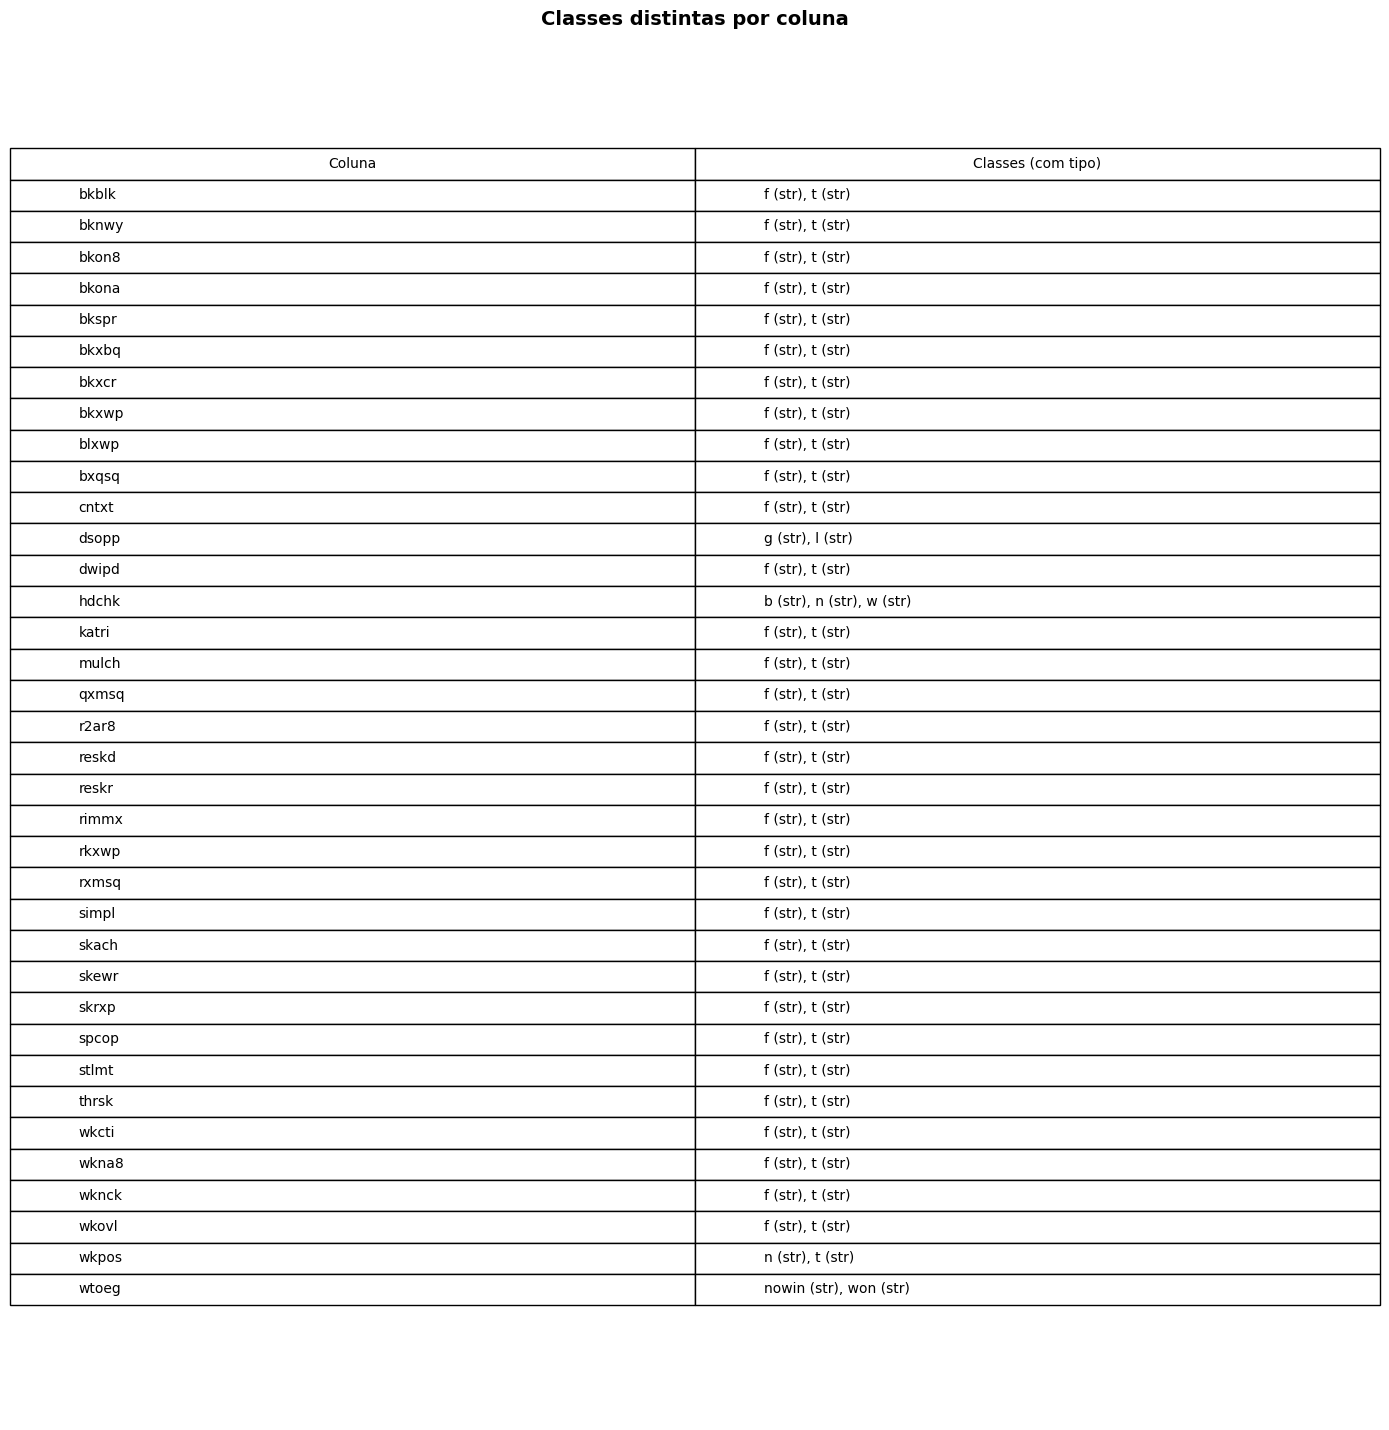

In [8]:
colunas = []
classes_texto = []

for coluna in df.columns:
    classes = set()
    for valor in df[coluna]:
        classes.add(f"{valor} ({type(valor).__name__})")

    colunas.append(coluna)
    classes_texto.append(", ".join(sorted(classes)))

# Criar DataFrame auxiliar
tabela = pd.DataFrame({
    "Coluna": colunas,
    "Classes (com tipo)": classes_texto
})

# Plotar tabela
fig, ax = plt.subplots(figsize=(14, len(tabela)*0.4))
ax.axis('tight')
ax.axis('off')
tabela_plotada = ax.table(cellText=tabela.values,
                          colLabels=tabela.columns,
                          loc='center',
                          cellLoc='left')

tabela_plotada.auto_set_font_size(False)
tabela_plotada.set_fontsize(10)
tabela_plotada.scale(1, 1.5)

plt.title("Classes distintas por coluna", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


<span style='font-size:16px; ;'>R: Os dados são qualitativos/categóricos. Eles descrevem a posição das peças no tabuleiro e as características associadas aquela configuração do tabuleiro, como por exemplo o atributo 'hdchk', que possui três possíveis categorias, w, b ou n, indicando, consecutivamente, se na posição em que as peças estão há um cheque oculto para as brancas, para as pretas, ou para nenhum dos dois. Os outros atributos, em suma, são taxados em true ou false, indicando se aquela característica que dá nome ao atributo, é verdadeira ou não para aquela configuração do tabuleiro daquela amostra.</span>

<h4>3. Identificação da escala de dados dos atributos de entrada (nominal, ordinal, intervalar,  racional):</h4>  

<span style='font-size:16px;'> R: A escala dos dados dos atributos de entrada são todas nominais. A maioria possui duas categorias, verdadeiro ou falso; 'hdchk' possui três cateogrias, mas sem que haja uma relação de ordem entre elas. </span>

<h4> 4. Exploração dos dados através de medidas de localidade: </h4>


<span style='font-size:16px;'>Como os dados são símbolicos, representando se determinada característica é verdadeira ou não, a única medida de localidade aplicável é moda.</span>

In [9]:
for coluna in df.columns:
    # Dicionário para contagens
    contagens = {}
    for valor in df[coluna]:
        # Incrementa a contagem do valor
        if valor in contagens:
            contagens[valor] += 1
        else:
            contagens[valor] = 1
    
    # Identifica a moda (categoria mais frequente)
    moda = None
    freq_maxima = 0
    for categoria, freq in contagens.items():
        if freq > freq_maxima:
            freq_maxima = freq
            moda = categoria

    total = len(df[coluna])
    porcentagem_moda = (freq_maxima / total) * 100

    print(f"Coluna: {coluna}")
    print(f"Categorias e frequências: {contagens}")
    print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: bkblk
Categorias e frequências: {'f': 2971, 't': 225}
Moda: f (ocorre 2971 vezes, 92.96% do total)

Coluna: bknwy
Categorias e frequências: {'f': 3076, 't': 120}
Moda: f (ocorre 3076 vezes, 96.25% do total)

Coluna: bkon8
Categorias e frequências: {'f': 2874, 't': 322}
Moda: f (ocorre 2874 vezes, 89.92% do total)

Coluna: bkona
Categorias e frequências: {'f': 2129, 't': 1067}
Moda: f (ocorre 2129 vezes, 66.61% do total)

Coluna: bkspr
Categorias e frequências: {'f': 1722, 't': 1474}
Moda: f (ocorre 1722 vezes, 53.88% do total)

Coluna: bkxbq
Categorias e frequências: {'f': 2026, 't': 1170}
Moda: f (ocorre 2026 vezes, 63.39% do total)

Coluna: bkxcr
Categorias e frequências: {'f': 2500, 't': 696}
Moda: f (ocorre 2500 vezes, 78.22% do total)

Coluna: bkxwp
Categorias e frequências: {'f': 1980, 't': 1216}
Moda: f (ocorre 1980 vezes, 61.95% do total)

Coluna: blxwp
Categorias e frequências: {'f': 2225, 't': 971}
Moda: f (ocorre 2225 vezes, 69.62% do total)

Coluna: bxqsq
Categorias

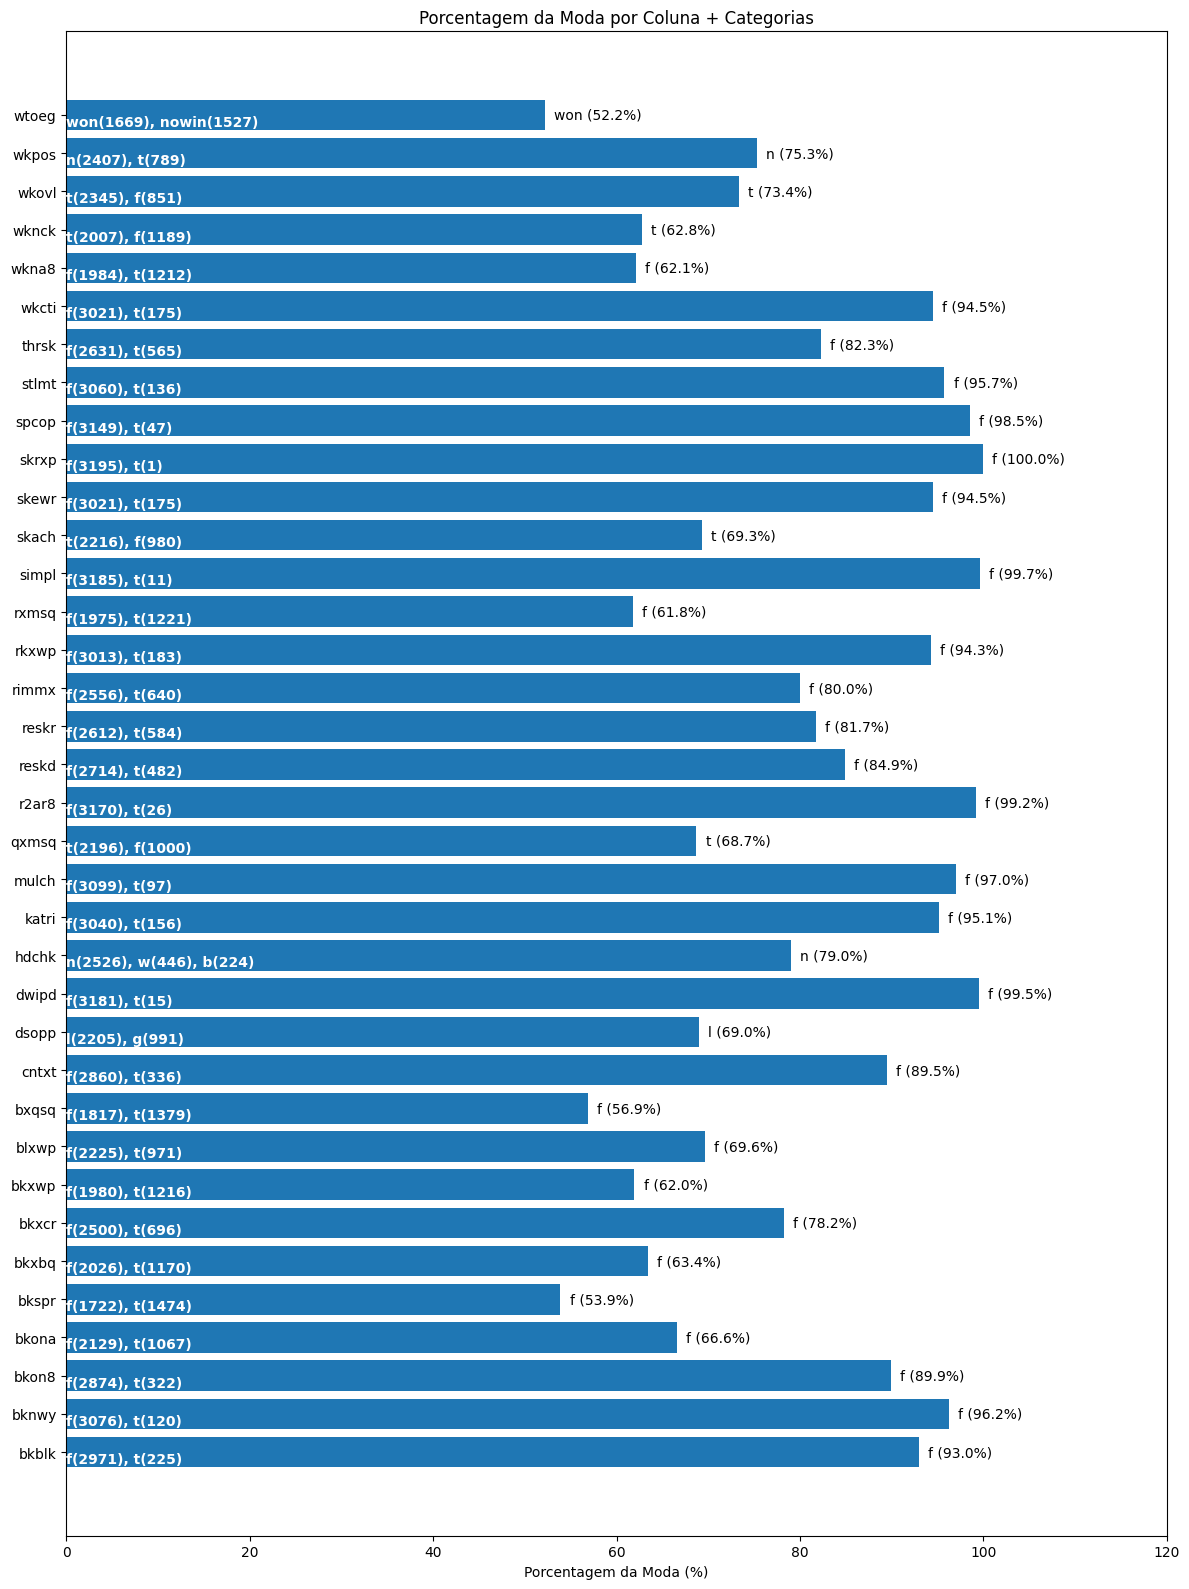

In [10]:
colunas = []
modas = []
porcentagens = []
categorias_por_coluna = []

for coluna in df.columns:
    contagens = {}
    for valor in df[coluna]:
        contagens[valor] = contagens.get(valor, 0) + 1

    # Moda e estatísticas
    moda = max(contagens, key=contagens.get)
    freq_max = contagens[moda]
    porcentagem = (freq_max / len(df[coluna])) * 100

    colunas.append(coluna)
    modas.append(moda)
    porcentagens.append(porcentagem)
    categorias_por_coluna.append(", ".join(f"{k}({v})" for k, v in contagens.items()))

# Gráfico
plt.figure(figsize=(12, 16))
bars = plt.barh(colunas, porcentagens)

plt.xlabel("Porcentagem da Moda (%)")
plt.title("Porcentagem da Moda por Coluna + Categorias")

# Adiciona o texto da moda e porcentagem ao lado das barras
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 1,              
        bar.get_y() + bar.get_height() / 2,
        f"{modas[i]} ({porcentagens[i]:.1f}%)",
        va='center'
    )

# Adiciona as categorias como legenda lateral
for i, txt in enumerate(categorias_por_coluna):
    plt.text(
        0,                         
        i,                         
        f"{txt}",
        fontsize=10,           
        fontweight='bold',     
        color="white",
        va='top'
    )

plt.xlim(0, 120)
plt.tight_layout()
plt.show()


<h4>5. Exploração dos dados através de medidas de espalhamento:</h4>

<h4>6. Exploração dos dados através de medidas de distribuição:</h4>

<h4>7. Identificação e separação do conjunto de teste, que será utilizado para testar o desempenho  dos modelos – o conjunto de testes deve ser representativo e ter as características da  população completa. Caso sua base de dados já tenha o conjunto de teste definido, analisar  se este segue as características do conjunto de treinamento:</h4>

In [11]:
import random

# Calcula quantas linhas representam 80% da base
total_linhas = len(df)
qtde_treino = int(0.8 * total_linhas)

indices_utilizados = set()
df_treino = pd.DataFrame(columns=df.columns)

# Loop para seleção aleatória de 80% dos dados
for _ in range(qtde_treino):
    while True:
        indice_aleatorio = random.randint(0, total_linhas - 1)
        if indice_aleatorio not in indices_utilizados:
            indices_utilizados.add(indice_aleatorio)
            linha = df.iloc[indice_aleatorio]
            df_treino = pd.concat([df_treino, pd.DataFrame([linha])], ignore_index=True)
            break

#  Criação do dataframe de teste com os índices que sobraram
todos_indices = set(range(total_linhas))
indices_teste = list(todos_indices - indices_utilizados)
df_teste = df.iloc[indices_teste].reset_index(drop=True)

# Verificações
print(f"Total original: {total_linhas}")
print(f"Treino: {len(df_treino)} linhas")
print(f"Teste: {len(df_teste)} linhas")

# Salva o CSV localmente
df_treino.to_csv('KRKPA7_treino.csv', index=False, encoding='utf-8')
df_teste.to_csv('KRKPA7_teste.csv', index=False, encoding='utf-8')

Total original: 3196
Treino: 2556 linhas
Teste: 640 linhas


In [12]:
contagens = {}
for valor in df_treino['wtoeg']:
    if valor in contagens:
        contagens[valor] += 1
    else:
        contagens[valor] = 1
    
# Identifica a moda (categoria mais frequente)
moda = None
freq_maxima = 0
for categoria, freq in contagens.items():
    if freq > freq_maxima:
        freq_maxima = freq
        moda = categoria

total = len(df_treino['wtoeg'])
porcentagem_moda = (freq_maxima / total) * 100

print("Coluna: wtoeg")
print(f"Categorias e frequências: {contagens}")
print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: wtoeg
Categorias e frequências: {'won': 1334, 'nowin': 1222}
Moda: won (ocorre 1334 vezes, 52.19% do total)



In [13]:
contagens = {}
for valor in df_teste['wtoeg']:
    if valor in contagens:
        contagens[valor] += 1
    else:
        contagens[valor] = 1
    
# Identifica a moda (categoria mais frequente)
moda = None
freq_maxima = 0
for categoria, freq in contagens.items():
    if freq > freq_maxima:
        freq_maxima = freq
        moda = categoria

total = len(df_teste['wtoeg'])
porcentagem_moda = (freq_maxima / total) * 100

print("Coluna: wtoeg")
print(f"Categorias e frequências: {contagens}")
print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: wtoeg
Categorias e frequências: {'won': 335, 'nowin': 305}
Moda: won (ocorre 335 vezes, 52.34% do total)



In [14]:
df_treino = pd.read_csv('KRKPA7_treino.csv')
df_teste = pd.read_csv('KRKPA7_teste.csv')

<h4>8. Identificação e eliminação de atributos não necessários:</h4>

<span style='font-size:16px;'>Todos os atributos dizem respeito à uma característica da configuração do tabuleiro na etapa final do jogo. O jogo em si só tem o rei preto, o rei branco, um peão preto e uma torre branca. Nesse sentido, esses atributos dizem respeito à posição dessas quatro peças no tabuleiro, da qual podem se extrair informações importantes, com xeques descobertos e outros dados, que são cada uma das colunas. Dessa forma, todos os atributos tem a ver com o atributo-alvo que diz se as brancas vão ganhar ou não, contudo, nem todas essas informações da posição das peças podem trazer de fato um peso na vitória das brancas. Isso será analisado no item 14. </span>

<h4>9. Identificação e eliminação de exemplos não necessários:</h4>
<span style='font-size:16px;'>Todos os exemplos são configurações legítimas do tabuleiro, contudo, isso não impede de haver duplicatas ou dados inconsistentes. Isso será analisado no item 12.</span>

<h4>10. Análise e aplicação de técnicas de amostragem de dados (caso não seja necessário, analisar
o porquê):</h4>
<span style='font-size:16px;'>Não é necessário uma amostragem de dados porque o conjunto de treinamento possui 2556 instâncias, todas binárias. Isso não representa uma quantidade muito grande para a área de dados nem exige muitos recursos computacionais.</span>

<h4>11. Identificação e aplicação de técnicas para minimizar problemas de desbalanceamento (caso
não seja necessário, analisar o porquê):</h4>
<span style='font-size:16px;'>Não são necessárias técnicas para minimizar problemas de desbalanceamento porque as duas classes da variável-alvo possuem uma diferênça de 2% em aparições, que pode ser considerado balanceado, 52% para 'win' e '48%' para 'notwin'.</span>

<h4>12. Limpeza de dados:</h4>
<h4>a. Identificação e eliminação de ruídos ou outliers:</h4><span style='font-size:16px;'> Como vimos no item 4, não há nenhum valor estranho nas classes das features. Todas estão como o esperado e de acordo com a documentação da base de dados. Também não há valores faltantes.</span>

<h4>b. Identificação e eliminação de dados inconsistentes:</h4>  

In [15]:
# Separar features e label
features_cols = df_treino.columns[:-1]  # todas menos a última
label_col = df_treino.columns[-1]       # última coluna é o label

# Estrutura para armazenar as combinações de features e seus labels
combinacoes = {}

# Verifica inconsistências
for index, row in df.iterrows():
    chave = tuple(row[features_cols])  # combinação de features como tupla

    if chave in combinacoes:
        combinacoes[chave].add(row[label_col])
    else:
        combinacoes[chave] = {row[label_col]}

# Mostrar inconsistências
inconsistencias = {k: v for k, v in combinacoes.items() if len(v) > 1}

# Imprimir resultado
if inconsistencias:
    print("Inconsistências encontradas:")
    for k, v in inconsistencias.items():
        print(f"Features: {k} -> Labels diferentes: {v}")
else:
    print("Nenhuma inconsistência encontrada.")


Inconsistências encontradas:
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'g', 

In [16]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

# Dicionário: chave = tuple(features), valor = lista de tuplas (index, label)
grupos = {}

for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Verificar inconsistências e imprimir
grupo_id = 1
for chave, instancias in grupos.items():
    labels_encontrados = set(label for _, label in instancias)
    
    if len(labels_encontrados) > 1:
        print(f"\n🔍 Chave de instâncias {grupo_id}:")
        for idx, lbl in instancias:
            print(f"{idx}: \"{lbl}\"")
        grupo_id += 1



🔍 Chave de instâncias 1:
24: "nowin"
285: "won"

🔍 Chave de instâncias 2:
53: "nowin"
1507: "won"

🔍 Chave de instâncias 3:
299: "nowin"
1954: "won"

🔍 Chave de instâncias 4:
325: "nowin"
874: "won"

🔍 Chave de instâncias 5:
423: "nowin"
1187: "won"

🔍 Chave de instâncias 6:
981: "won"
2406: "nowin"

🔍 Chave de instâncias 7:
1544: "nowin"
2129: "won"


In [17]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

grupos = {}

for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Identificar índices a serem removidos (duplas inconsistentes)
indices_para_remover = []

for instancias in grupos.values():
    if len(instancias) == 2:
        labels = {label for _, label in instancias}
        if len(labels) > 1:
            # instâncias com labels diferentes → inconsistente
            indices_para_remover.extend([idx for idx, _ in instancias])

# Remover as inconsistências
df_treino = df_treino.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas inconsistentes removidas.")

14 linhas inconsistentes removidas.


In [18]:
features_cols = df_teste.columns[:-1]
label_col = df_teste.columns[-1]

grupos = {}

for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Verificar inconsistências e imprimir
grupo_id = 1
for chave, instancias in grupos.items():
    labels_encontrados = set(label for _, label in instancias)
    
    if len(labels_encontrados) > 1:
        print(f"\n🔍 Chave de instâncias {grupo_id}:")
        for idx, lbl in instancias:
            print(f"{idx}: \"{lbl}\"")
        grupo_id += 1


🔍 Chave de instâncias 1:
19: "won"
389: "nowin"

🔍 Chave de instâncias 2:
151: "won"
430: "nowin"

🔍 Chave de instâncias 3:
400: "nowin"
581: "won"


In [19]:
features_cols = df_teste.columns[:-1]
label_col = df_teste.columns[-1]

grupos = {}

for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Identificar índices a serem removidos (duplas inconsistentes)
indices_para_remover = []

for instancias in grupos.values():
    if len(instancias) == 2:
        labels = {label for _, label in instancias}
        if len(labels) > 1:
            # instâncias com labels diferentes → inconsistente
            indices_para_remover.extend([idx for idx, _ in instancias])

# Remover as inconsistências
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas inconsistentes removidas.")

6 linhas inconsistentes removidas.


In [20]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

grupos = {}

# Agrupar as linhas de df_treino
for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [("df_treino", index, label)]
    else:
        grupos[chave].append(("df_treino", index, label))

# Agrupar as linhas de df_teste
for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [("df_teste", index, label)]
    else:
        grupos[chave].append(("df_teste", index, label))

# Verificar inconsistências e imprime
grupo_id = 1
for chave, instancias in grupos.items():
    # Só nos interessam casos com dados de ambos os dataframes
    origens = {origem for origem, _, _ in instancias}
    labels = {label for _, _, label in instancias}
    
    if len(origens) > 1 and len(labels) > 1:
        print(f"\n🔍 Chave de instâncias {grupo_id}:")
        for origem, idx, lbl in instancias:
            print(f"{origem} - índice {idx}: \"{lbl}\"")
        grupo_id += 1



🔍 Chave de instâncias 1:
df_treino - índice 580: "nowin"
df_teste - índice 149: "won"

🔍 Chave de instâncias 2:
df_treino - índice 803: "nowin"
df_teste - índice 553: "won"

🔍 Chave de instâncias 3:
df_treino - índice 1148: "won"
df_teste - índice 372: "nowin"

🔍 Chave de instâncias 4:
df_treino - índice 1502: "won"
df_teste - índice 381: "nowin"

🔍 Chave de instâncias 5:
df_treino - índice 1976: "won"
df_teste - índice 422: "nowin"


In [21]:
# Coletar as chaves inconsistentes
chaves_inconsistentes = set()

for chave, instancias in grupos.items():
    origens = {origem for origem, _, _ in instancias}
    labels = {label for _, _, label in instancias}
    
    if len(origens) > 1 and len(labels) > 1:
        chaves_inconsistentes.add(chave)

# Função para marcar linhas a serem removidas
def indices_para_remover(df, chaves_inconsistentes):
    indices = []
    for idx, row in df.iterrows():
        chave = tuple(row[features_cols])
        if chave in chaves_inconsistentes:
            indices.append(idx)
    return indices

# Obter os índices a remover em cada dataframe
indices_df_treino = indices_para_remover(df_treino, chaves_inconsistentes)
indices_df_teste = indices_para_remover(df_teste, chaves_inconsistentes)

# Remover as linhas
df_treino = df_treino.drop(index=indices_df_treino).reset_index(drop=True)
df_teste = df_teste.drop(index=indices_df_teste).reset_index(drop=True)

print(f"Removidas {len(indices_df_treino)} linhas de df_treino e {len(indices_df_teste)} de df_teste por inconsistência.")


Removidas 5 linhas de df_treino e 5 de df_teste por inconsistência.


<h4>c. Identificação e eliminação de dados reduntadantes:</h4>

In [22]:
instancias = {}

for index, row in df_treino.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Mostrar apenas as chaves com duplicatas
grupo_id = 1
for chave, indices in instancias.items():
    if len(indices) > 1:
        print(f"\n🔁 Instância duplicada {grupo_id}:")
        print(f"Valores: {chave}")
        print("Índices:", indices)
        grupo_id += 1



🔁 Instância duplicada 1:
Valores: ('f', 'f', 'f', 'f', 't', 'f', 't', 't', 't', 't', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n', 'nowin')
Índices: [25, 631]

🔁 Instância duplicada 2:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
Índices: [28, 1520]

🔁 Instância duplicada 3:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 't', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
Índices: [73, 966]

🔁 Instância duplicada 4:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 't', 'n', 'won')
Índices: [92, 1178]

🔁 Instância duplicada 5:
Valores: ('f', 'f'

In [23]:
instancias = {}

for index, row in df_treino.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Coletar os índices que devem ser removidos (duplicatas além da primeira)
indices_para_remover = []

for indices in instancias.values():
    if len(indices) > 1:
        # Mantém o primeiro, remove os demais
        indices_para_remover.extend(indices[1:])

# Remove as duplicatas
df_treino = df_treino.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} duplicatas removidas manualmente do df_treino.")


38 duplicatas removidas manualmente do df_treino.


In [24]:
instancias = {}

for index, row in df_teste.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Mostrar apenas as chaves com duplicatas
grupo_id = 1
for chave, indices in instancias.items():
    if len(indices) > 1:
        print(f"\n🔁 Instância duplicada {grupo_id}:")
        print(f"Valores: {chave}")
        print("Índices:", indices)
        grupo_id += 1



🔁 Instância duplicada 1:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
Índices: [289, 417]


In [25]:
instancias = {}

for index, row in df_teste.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Coletar os índices que devem ser removidos (duplicatas além da primeira)
indices_para_remover = []

for indices in instancias.values():
    if len(indices) > 1:
        # Mantém o primeiro, remove os demais
        indices_para_remover.extend(indices[1:])

# Remove as duplicatas
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} duplicatas removidas manualmente do df_teste.")


1 duplicatas removidas manualmente do df_teste.


In [26]:
# Criar conjuntos de tuplas com todas as colunas (linha completa) para cada dataframe
linhas_treino = {}
for idx, row in df_treino.iterrows():
    chave = tuple(row)
    if chave not in linhas_treino:
        linhas_treino[chave] = [idx]
    else:
        linhas_treino[chave].append(idx)

linhas_teste = {}
for idx, row in df_teste.iterrows():
    chave = tuple(row)
    if chave not in linhas_teste:
        linhas_teste[chave] = [idx]
    else:
        linhas_teste[chave].append(idx)

# Verificar interseção entre os dois conjuntos de chaves
chaves_duplicadas = set(linhas_treino.keys()) & set(linhas_teste.keys())

# Exibir resultados
if chaves_duplicadas:
    print(f"\n🔁 Encontradas {len(chaves_duplicadas)} instâncias duplicadas entre treino e teste:\n")
    for i, chave in enumerate(chaves_duplicadas, start=1):
        print(f"Duplicata {i}:")
        print(f"  Valores: {chave}")
        print(f"  Índices no treino: {linhas_treino[chave]}")
        print(f"  Índices no teste : {linhas_teste[chave]}")
        print()
else:
    print("✅ Nenhuma duplicata encontrada entre df_treino e df_teste.")



🔁 Encontradas 9 instâncias duplicadas entre treino e teste:

Duplicata 1:
  Valores: ('f', 'f', 'f', 'f', 't', 't', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n', 'won')
  Índices no treino: [1008]
  Índices no teste : [73]

Duplicata 2:
  Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n', 'won')
  Índices no treino: [1192]
  Índices no teste : [16]

Duplicata 3:
  Valores: ('f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 't', 'n', 'won')
  Índices no treino: [224]
  Índices no teste : [61]

Duplicata 4:
  Valores: ('f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f'

In [27]:
# Cria conjunto de tuplas com todas as colunas do df_treino
linhas_treino = set(tuple(row) for _, row in df_treino.iterrows())

# Identifica índices de df_teste que estão duplicados no df_treino
indices_para_remover = []
for idx, row in df_teste.iterrows():
    if tuple(row) in linhas_treino:
        indices_para_remover.append(idx)

# Remove essas linhas do df_teste
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas removidas do df_teste por serem duplicadas com o df_treino.")


9 linhas removidas do df_teste por serem duplicadas com o df_treino.


In [28]:
def analisar_coluna_alvo(df, nome_df, coluna_alvo):
    print(f"\n📊 Análise da coluna-alvo '{coluna_alvo}' em {nome_df}:")

    # Frequências das categorias
    freq = df[coluna_alvo].value_counts()
    total = freq.sum()
    categorias = freq.to_dict()

    # Moda (valor mais frequente)
    moda = freq.idxmax()
    freq_moda = freq.max()
    perc_moda = (freq_moda / total) * 100

    # Impressão
    print(f"Categorias e frequências: {categorias}")
    print(f"Moda: {moda} (ocorre {freq_moda} vezes, {perc_moda:.2f}% do total)")

# Aplicar para df_treino e df_teste
analisar_coluna_alvo(df_treino, "df_treino", "wtoeg")
analisar_coluna_alvo(df_teste, "df_teste", "wtoeg")



📊 Análise da coluna-alvo 'wtoeg' em df_treino:
Categorias e frequências: {'won': 1294, 'nowin': 1205}
Moda: won (ocorre 1294 vezes, 51.78% do total)

📊 Análise da coluna-alvo 'wtoeg' em df_teste:
Categorias e frequências: {'won': 324, 'nowin': 295}
Moda: won (ocorre 324 vezes, 52.34% do total)


<h4>d. Identificação e resolução de dados incompletos (ausentes) - utilização de alguma técnica de preenchimento e justificar:</h4>

<h4>13. Identificação e conversão dos tipos de dados (caso não seja necessário, analisar o porquê).</h4>

<span>Por ser uma base de dados com colunas de atributos categóricos e binários (sim ou não na maioria), podemos converter a base de dados para um formato de 1s ou 0s, o que é prática costumeira na ciência de dados, pois valores numéricos facilitam todas as medidas, cálculos e algoritmos por ser a linguuagem comum do computador. Somente a coluna hdchk que possui três categorias, w (cheque oculto das brancas), b (cheque oculto das pretas e n (nenhum cheque oculto). Essa coluna será convertida em outras duas colunas, hdchk_w que receberá 1 quando hdchk for w e hdchk_b que receberá 1 quando hdchk for b. A categoria n seria representada por hdchk_w e hdchk_b ambas em 0.  </span>

In [29]:
# codificar t/f para 1/0
map_bin = {'f': 0, 't': 1}
df_treino_encoded = df_treino.copy()
for col in df_treino.columns[:-1]:
    if col not in ['wkpos', 'hdchk', 'dsopp']:
        df_treino_encoded[col] = df_treino[col].replace(map_bin)

# codificar wkpos (t/n)
df_treino_encoded['wkpos'] = df_treino['wkpos'].replace({'t':1, 'n':0})
# codificar dsopp (t/n)
df_treino_encoded['dsopp'] = df_treino['dsopp'].replace({'l': 0, 'g': 1})

# codificar hdchk (w, b, n)
df_treino_encoded['hdchk_w'] = (df_treino['hdchk'] == 'w').astype(int)
df_treino_encoded['hdchk_b'] = (df_treino['hdchk'] == 'b').astype(int)

# remover a coluna hdchk original
df_treino_encoded = df_treino_encoded.drop(columns=['hdchk'])

# codificar target
df_treino_encoded['wtoeg'] = df_treino['wtoeg'].map({'won':1, 'nowin':0})

# mover wtoeg para última coluna
cols = [col for col in df_treino_encoded.columns if col != 'wtoeg'] + ['wtoeg']
df_treino_encoded = df_treino_encoded[cols]

# salvar
df_treino_encoded.to_csv("KRKPA7_treino_numerico.csv", index=False)

/tmp/ipykernel_5260/694751381.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_treino_encoded[col] = df_treino[col].replace(map_bin)
/tmp/ipykernel_5260/694751381.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_treino_encoded['wkpos'] = df_treino['wkpos'].replace({'t':1, 'n':0})
/tmp/ipykernel_5260/694751381.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

In [30]:
df_treino = pd.read_csv('KRKPA7_treino_numerico.csv')

In [31]:
df_treino

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,hdchk_w,hdchk_b,wtoeg
0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2495,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1
2496,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1
2497,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [32]:
# codificar t/f para 1/0
map_bin = {'f': 0, 't': 1}
df_teste_encoded = df_teste.copy()
for col in df_teste.columns[:-1]:
    if col not in ['wkpos', 'hdchk', 'dsopp']:
        df_teste_encoded[col] = df_teste[col].replace(map_bin)

# codificar wkpos (t/n)
df_teste_encoded['wkpos'] = df_teste['wkpos'].replace({'t':1, 'n':0})
# codificar dsopp (t/n)
df_teste_encoded['dsopp'] = df_teste['dsopp'].replace({'l': 0, 'g': 1})

# codificar hdchk (w, b, n)
df_teste_encoded['hdchk_w'] = (df_teste['hdchk'] == 'w').astype(int)
df_teste_encoded['hdchk_b'] = (df_teste['hdchk'] == 'b').astype(int)

# remover a coluna hdchk original
df_teste_encoded = df_teste_encoded.drop(columns=['hdchk'])

# codificar target
df_teste_encoded['wtoeg'] = df_teste['wtoeg'].map({'won':1, 'nowin':0})

# mover wtoeg para última coluna
cols = [col for col in df_teste_encoded.columns if col != 'wtoeg'] + ['wtoeg']
df_teste_encoded = df_teste_encoded[cols]

# salvar
df_teste_encoded.to_csv("KRKPA7_teste_numerico.csv", index=False)

/tmp/ipykernel_5260/1774180378.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste_encoded[col] = df_teste[col].replace(map_bin)
/tmp/ipykernel_5260/1774180378.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste_encoded['wkpos'] = df_teste['wkpos'].replace({'t':1, 'n':0})
/tmp/ipykernel_5260/1774180378.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [33]:
df_teste = pd.read_csv('KRKPA7_teste_numerico.csv')

In [34]:
df_teste

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,hdchk_w,hdchk_b,wtoeg
0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
3,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1
615,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1
616,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1
617,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1


<h4>14. Análise e aplicação de alguma técnica para redução de dimensionalidade – pesquisar
alguma técnica utilizada na literatura e aplicar:</h4>

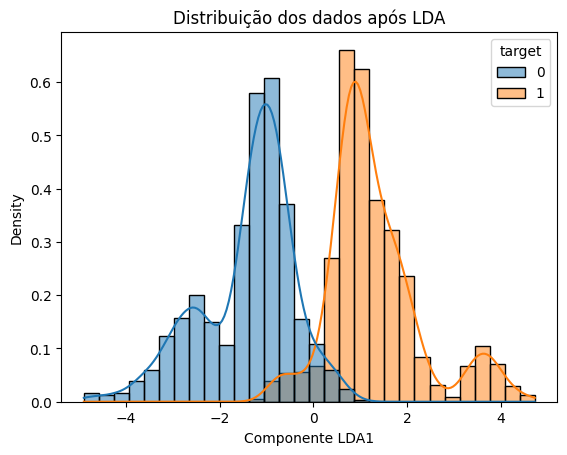

In [35]:
df_treino = pd.read_csv('KRKPA7_treino_numerico.csv')

#Separando features e target
X = df_treino.drop(columns='wtoeg')
y = df_treino['wtoeg']

#LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Para 2 classes, n_components=1
X_lda = lda.fit_transform(X, y)

df_treino = pd.DataFrame(X_lda, columns=['LDA1'])
df_treino['target'] = y.values

# Visualizando o resultado
sns.histplot(data=df_treino, x='LDA1', hue='target', kde=True, stat='density', common_norm=False)
plt.title('Distribuição dos dados após LDA')
plt.xlabel('Componente LDA1')
plt.show()


In [36]:
df_treino

,LDA1,target
0,1.010583,1
1,0.283059,1
2,0.434231,1
3,1.624120,1
4,-2.203500,0
...,...,...
2494,-0.677549,0
2495,1.050416,1
2496,-0.274516,1
2497,-3.037145,0


In [37]:
print(df_treino.max())
print(df_treino.min())

LDA1      4.720669
target    1.000000
dtype: float64
LDA1     -4.894056
target    0.000000
dtype: float64


In [38]:
df_treino.to_csv("KRKPA7_treino_LDA.csv", index=False)

In [39]:
# Extrai os valores da coluna LDA1 como array
valores = df_treino["LDA1"].values

# Calcula a média
media = sum(valores) / len(valores)

# Calcula o desvio padrão
variancia = sum((x - media) ** 2 for x in valores) / (len(valores) - 1)
desvio_padrao = variancia ** 0.5

# Cria um novo DataFrame com LDA1 padronizado e target original
df_treino_normalizado = pd.DataFrame({
    "LDA1": [(x - media) / desvio_padrao for x in valores],
    "target": df_treino["target"].values
})

print(df_treino_normalizado.max())
print(df_treino_normalizado.min())
df_treino_normalizado.to_csv("KRKPA7_treino_LDA_normalizado.csv", index=False)

LDA1      2.822949
target    1.000000
dtype: float64
LDA1     -2.926634
target    0.000000
dtype: float64


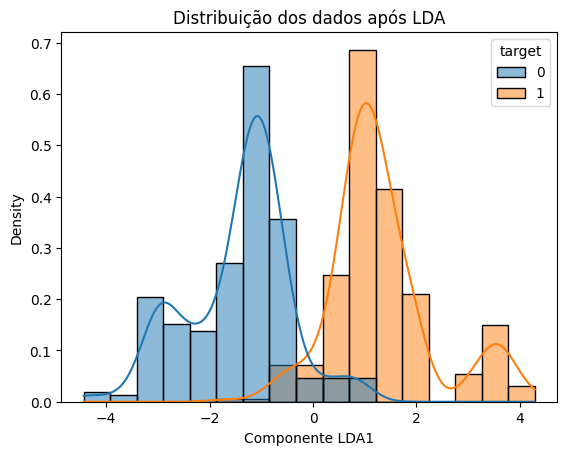

In [40]:
# Separando features e target
X = df_teste.drop(columns='wtoeg')
y = df_teste['wtoeg']

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Para 2 classes, n_components=1
X_lda = lda.fit_transform(X, y)

df_teste = pd.DataFrame(X_lda, columns=['LDA1'])
df_teste['target'] = y.values

# Visualizando o resultado
sns.histplot(data=df_teste, x='LDA1', hue='target', kde=True, stat='density', common_norm=False)
plt.title('Distribuição dos dados após LDA')
plt.xlabel('Componente LDA1')
plt.show()


In [41]:
df_teste

,LDA1,target
0,0.800948,1
1,0.621283,1
2,1.531423,1
3,0.433252,1
4,1.462812,1
...,...,...
614,-0.015496,1
615,0.727426,1
616,0.747719,1
617,0.498482,1


In [42]:
df_teste.to_csv("KRKPA7_teste_LDA.csv", index=False)

In [43]:
# Extrai os valores da coluna LDA1 como array
valores = df_teste["LDA1"].values

# Calcula a média
media = sum(valores) / len(valores)

# Calcula o desvio padrão
variancia = sum((x - media) ** 2 for x in valores) / (len(valores) - 1)
desvio_padrao = variancia ** 0.5

# Cria um novo DataFrame com LDA1 padronizado e target original
df_teste_normalizado = pd.DataFrame({
    "LDA1": [(x - media) / desvio_padrao for x in valores],
    "target": df_teste["target"].values
})

print(df_teste_normalizado.max())
print(df_teste_normalizado.min())
df_teste_normalizado.to_csv("KRKPA7_teste_LDA_normalizado.csv", index=False)

LDA1      2.527105
target    1.000000
dtype: float64
LDA1     -2.611959
target    0.000000
dtype: float64


<h2 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Análise Preditiva
</h2>

In [3]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
df_teste = pd.read_csv('KRKPA7_teste_LDA_normalizado.csv')

<h4>1. Definição da técnica de validação a ser utilizada (cross-validation, hold-out, leave-one-out,
etc):</h4>

<span style='font-size:16px; ;'>R: A técnica de validação a ser utilizada será o leave-one-out devido à quantidade de amostras disponíveis.</span>

<h4>2. Definição das métricas a serem utilizadas para avaliar os resultados preditivos dos modelos
(acurácia, precisão, recall, matriz de confusão, etc): </h4>

In [4]:
metricas_validacao = {
    'KNN': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Árvore de Decisão': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Rede Neural': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}


<h4>3. Definição de um algoritmo base (baseline), que será utilizado como base para análise dos
resultados – algoritmo classe majoritária: </h4>

In [5]:
  """
    baseline que prediz 1 se LDA1 > 0, senão 0.
    Retorna:
        np.ndarray com os valores previstos (0 ou 1)
    """
def baseline_lda1_predict(X_teste: pd.DataFrame) -> np.ndarray:
  
    return (X_teste["LDA1"] > 0).astype(int).values

In [6]:
X = df_treino[["LDA1"]].values
y = df_treino["target"].values

<h4>4. Criação de modelo preditivo utilizando algoritmo de indução baseado nos vizinhos mais
próximos e similaridade de dados (K-NN): </h4>

=== Métricas globais (Leave-One-Out + KNN Euclidiano) ===
VP (VP): 1227
FP: 74
VN (VN): 1116
FN: 84

Precisão: 0.9431
Recall (Sensibilidade): 0.9359
Especificidade: 0.9378
Acurácia: 0.9368
F1-score: 0.9395
TFP (Erro tipo I): 0.0622
TFN (Erro tipo II): 0.0641


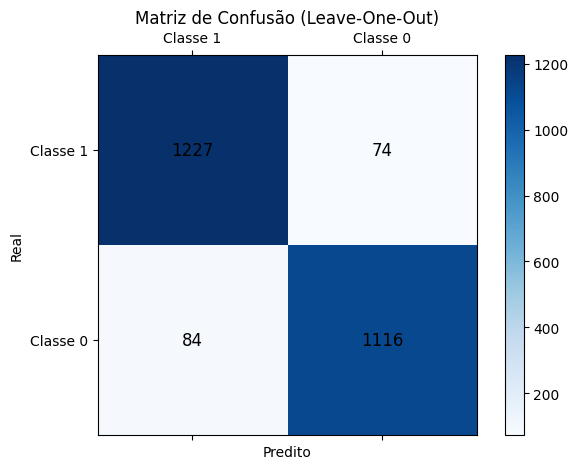

In [7]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values

# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    # Separar amostra de teste
    X_test = X[i].reshape(1, -1)
    y_test = y[i]
    
    # Criar conjuntos de treino
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # KNN com distância euclidiana
    knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular métricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

# Exibir resultados
print("=== Métricas globais (Leave-One-Out + KNN Euclidiano) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precisão: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

metricas_validacao['KNN']['Acurácia'] = accuracy
metricas_validacao['KNN']['Precisão'] = precision
metricas_validacao['KNN']['Recall'] = recall
metricas_validacao['KNN']['Especificidade'] = specificity
metricas_validacao['KNN']['F1-score'] = f1_score
metricas_validacao['KNN']['TFP'] = tfp
metricas_validacao['KNN']['TFN'] = tfn
metricas_validacao['KNN']['VP'] = VP
metricas_validacao['KNN']['VN'] = VN
metricas_validacao['KNN']['FP'] = FP
metricas_validacao['KNN']['FN'] = FN

# Matriz de confusão
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Leave-One-Out)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>5. Criação de modelo preditivo utilizando algoritmo de indução baseado em árvores de
decisão (decision tree ou árvore C4.5):</h4>

=== Métricas globais (Leave-One-Out + Árvore de Decisão) ===
VP (VP): 1253
FP: 65
VN (VN): 1125
FN: 58

Precisão: 0.9507
Recall (Sensibilidade): 0.9558
Especificidade: 0.9454
Acurácia: 0.9508
F1-score: 0.9532
TFP (Erro tipo I): 0.0546
TFN (Erro tipo II): 0.0442


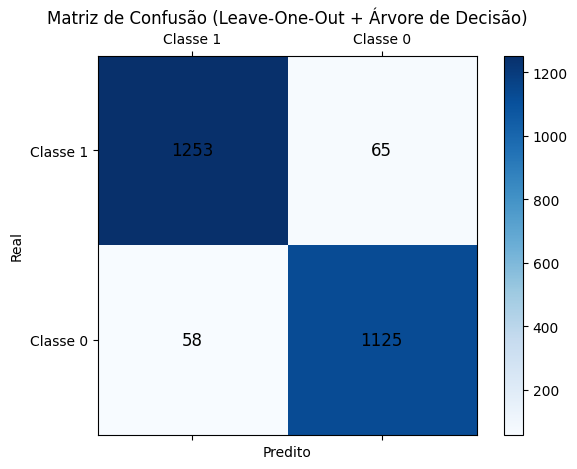

In [8]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values
# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    # Separar a amostra de teste
    X_test = X[i].reshape(1, -1)
    y_test = y[i]

    # Criar conjuntos de treino
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # Árvore de decisão
    tree =  DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    random_state=42
)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular métricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

metricas_validacao['Árvore de Decisão']['Acurácia'] = accuracy
metricas_validacao['Árvore de Decisão']['Precisão'] = precision
metricas_validacao['Árvore de Decisão']['Recall'] = recall
metricas_validacao['Árvore de Decisão']['Especificidade'] = specificity
metricas_validacao['Árvore de Decisão']['F1-score'] = f1_score
metricas_validacao['Árvore de Decisão']['TFP'] = tfp
metricas_validacao['Árvore de Decisão']['TFN'] = tfn
metricas_validacao['Árvore de Decisão']['VP'] = VP
metricas_validacao['Árvore de Decisão']['VN'] = VN
metricas_validacao['Árvore de Decisão']['FP'] = FP
metricas_validacao['Árvore de Decisão']['FN'] = FN

# Exibir resultados
print("=== Métricas globais (Leave-One-Out + Árvore de Decisão) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precisão: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

# Matriz de confusão
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Leave-One-Out + Árvore de Decisão)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>6. Criação de modelo preditivo utilizando algoritmo de indução redes neurais artificiais
(MLP): </h4>

=== Métricas globais (Leave-One-Out + MLP) ===
VP (VP): 1254
FP: 79
VN (VN): 1111
FN: 57

Precisão: 0.9407
Recall (Sensibilidade): 0.9565
Especificidade: 0.9336
Acurácia: 0.9456
F1-score: 0.9486
TFP (Erro tipo I): 0.0664
TFN (Erro tipo II): 0.0435


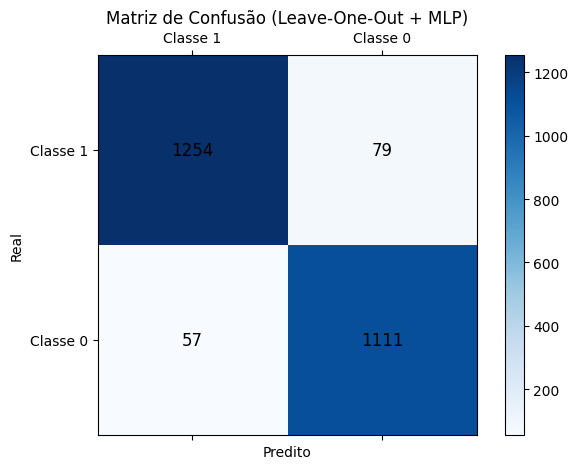

In [9]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values
# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    X_test = X[i].reshape(1, -1)
    y_test = y[i]

    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # MLP com camada oculta de 5 neurônios
    mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=0, early_stopping=True)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular métricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

metricas_validacao['Rede Neural']['Acurácia'] = accuracy
metricas_validacao['Rede Neural']['Precisão'] = precision
metricas_validacao['Rede Neural']['Recall'] = recall
metricas_validacao['Rede Neural']['Especificidade'] = specificity
metricas_validacao['Rede Neural']['F1-score'] = f1_score
metricas_validacao['Rede Neural']['TFP'] = tfp
metricas_validacao['Rede Neural']['TFN'] = tfn
metricas_validacao['Rede Neural']['VP'] = VP
metricas_validacao['Rede Neural']['VN'] = VN
metricas_validacao['Rede Neural']['FP'] = FP
metricas_validacao['Rede Neural']['FN'] = FN

# Exibir resultados
print("=== Métricas globais (Leave-One-Out + MLP) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precisão: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

# Matriz de confusão
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Leave-One-Out + MLP)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>7. Análise dos resultados do algoritmo baseline: </h4>

In [15]:
X_teste = df_teste[["LDA1"]]
y_real = df_teste["target"].values
y_pred = baseline_lda1_predict(X_teste)
df_resultados_baseline = pd.DataFrame()
df_resultados_baseline = pd.DataFrame({
    "Baseline": y_pred,
    "Real": y_real
})

In [16]:
df_resultados_baseline

,Baseline,Real
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
612,1,1
613,1,1
614,0,1
615,1,1


In [17]:
def contar_confusao(preds, reais):
    vp = ((preds == 1) & (reais == 1)).sum()
    vn = ((preds == 0) & (reais == 0)).sum()
    fp = ((preds == 1) & (reais == 0)).sum()
    fn = ((preds == 0) & (reais == 1)).sum()
    return vp, fp, vn, fn

# Calcular os valores para cada modelo
vp_baseline, fp_baseline, vn_baseline, fn_baseline = contar_confusao(df_resultados_baseline["Baseline"], df_resultados_baseline["Real"])

# Calcular métricas globais
precision_baseline = vp_baseline / (vp_baseline + fp_baseline) if (vp_baseline + fp_baseline) > 0 else 0
recall_baseline = vp_baseline / (vp_baseline + fn_baseline) if (vp_baseline + fn_baseline) > 0 else 0
specificity_baseline = vn_baseline / (vn_baseline + fp_baseline) if (vn_baseline + fp_baseline) > 0 else 0
accuracy_baseline = (vp_baseline + vn_baseline) / (vp_baseline + vn_baseline + fp_baseline + fn_baseline)
f1_score_baseline = 2 * (precision_baseline * recall_baseline) / (precision_baseline + recall_baseline) if (precision_baseline + recall_baseline) > 0 else 0
tfp_baseline = fp_baseline / (fp_baseline + vn_baseline) if (fp_baseline + vn_baseline) > 0 else 0
tfn_baseline = fn_baseline / (fn_baseline + vp_baseline) if (fn_baseline + vp_baseline) > 0 else 0

metricas_teste_baseline = {
    'Baseline': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}

metricas_teste_baseline['Baseline']['Acurácia'] = accuracy_baseline
metricas_teste_baseline['Baseline']['Precisão'] = precision_baseline
metricas_teste_baseline['Baseline']['Recall'] = recall_baseline
metricas_teste_baseline['Baseline']['Especificidade'] = specificity_baseline
metricas_teste_baseline['Baseline']['F1-score'] = f1_score_baseline
metricas_teste_baseline['Baseline']['TFP'] = tfp_baseline
metricas_teste_baseline['Baseline']['TFN'] = tfn_baseline
metricas_teste_baseline['Baseline']['VP'] = vp_baseline
metricas_teste_baseline['Baseline']['VN'] = vn_baseline
metricas_teste_baseline['Baseline']['FP'] = fp_baseline
metricas_teste_baseline['Baseline']['FN'] = fn_baseline
df_metricas_teste_baseline = pd.DataFrame.from_dict(metricas_teste_baseline, orient='index')

In [18]:
df_metricas_teste_baseline

,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score
Baseline,288,15,295,19,0.944895,0.950495,0.938111,0.951613,0.048387,0.061889,0.944262


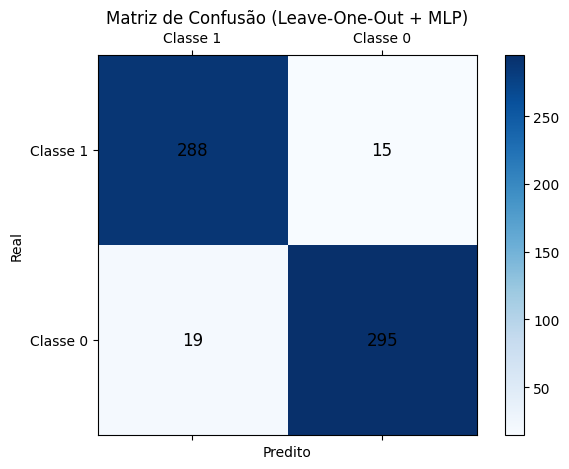

In [19]:
# Matriz de confusão
conf_matrix = np.array([[metricas_teste_baseline['Baseline']['VP'], metricas_teste_baseline['Baseline']['FP']],
                        [metricas_teste_baseline['Baseline']['FN'], metricas_teste_baseline['Baseline']['VN']]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Leave-One-Out + MLP)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()

<h4>8. Análise dos resultados dos três algoritmos de aprendizado de máquina supracitados: </h4>

In [20]:
metricas_validacao

{'KNN': {'VP': 1227,
  'FP': 74,
  'VN': 1116,
  'FN': 84,
  'Acurácia': 0.9368252698920432,
  'Precisão': 0.9431206764027671,
  'Recall': 0.9359267734553776,
  'Especificidade': 0.9378151260504202,
  'TFP': 0.06218487394957983,
  'TFN': 0.06407322654462243,
  'F1-score': 0.9395099540581929},
 'Árvore de Decisão': {'VP': 1253,
  'FP': 65,
  'VN': 1125,
  'FN': 58,
  'Acurácia': 0.9508196721311475,
  'Precisão': 0.9506828528072838,
  'Recall': 0.9557589626239512,
  'Especificidade': 0.9453781512605042,
  'TFP': 0.0546218487394958,
  'TFN': 0.04424103737604882,
  'F1-score': 0.9532141498668696},
 'Rede Neural': {'VP': 1254,
  'FP': 79,
  'VN': 1111,
  'FN': 57,
  'Acurácia': 0.9456217512994802,
  'Precisão': 0.940735183795949,
  'Recall': 0.9565217391304348,
  'Especificidade': 0.9336134453781513,
  'TFP': 0.06638655462184874,
  'TFN': 0.043478260869565216,
  'F1-score': 0.9485627836611196}}

In [21]:
df_metricas_validacao = pd.DataFrame.from_dict(metricas_validacao, orient='index')

In [22]:
df_metricas_validacao

,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score
KNN,1227,74,1116,84,0.936825,0.943121,0.935927,0.937815,0.062185,0.064073,0.939510
Árvore de Decisão,1253,65,1125,58,0.950820,0.950683,0.955759,0.945378,0.054622,0.044241,0.953214
Rede Neural,1254,79,1111,57,0.945622,0.940735,0.956522,0.933613,0.066387,0.043478,0.948563


In [23]:
# Calcular a média das métricas principais para cada modelo
metricas_principais = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
df_metricas_validacao['Média'] = df_metricas_validacao[metricas_principais].mean(axis=1)

# Ordenar os modelos pela média das métricas principais
df_metricas_validacao = df_metricas_validacao.sort_values(by='Média')

In [24]:
df_metricas_validacao

,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score,Média
KNN,1227,74,1116,84,0.936825,0.943121,0.935927,0.937815,0.062185,0.064073,0.939510,0.938846
Rede Neural,1254,79,1111,57,0.945622,0.940735,0.956522,0.933613,0.066387,0.043478,0.948563,0.947860
Árvore de Decisão,1253,65,1125,58,0.950820,0.950683,0.955759,0.945378,0.054622,0.044241,0.953214,0.952619


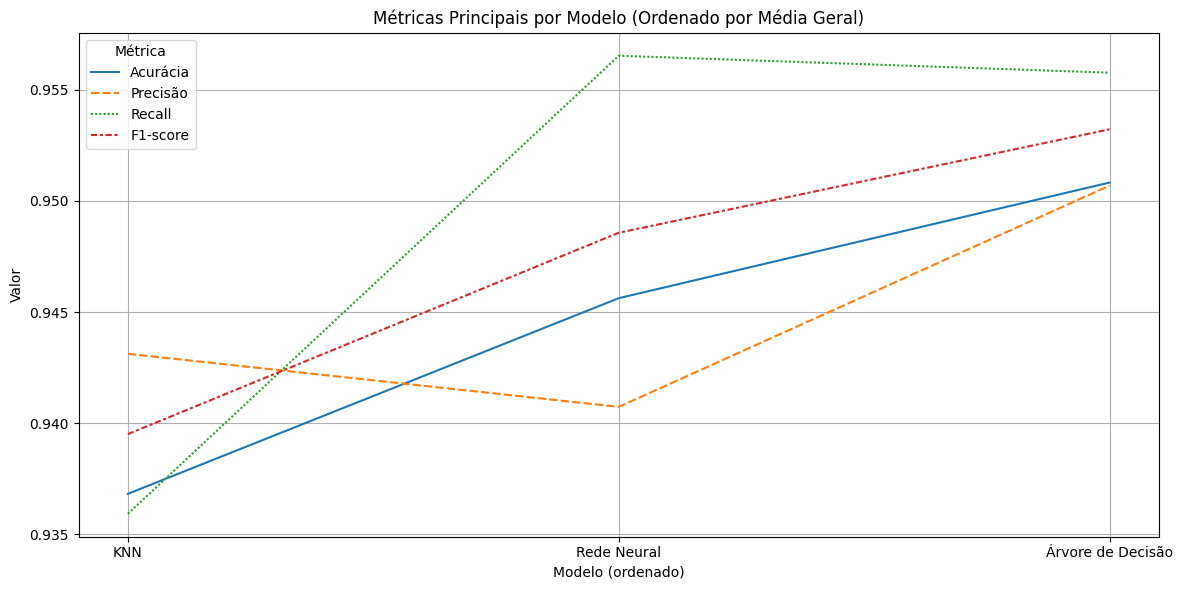

In [25]:

# Plotar gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_validacao[metricas_principais])
plt.title('Métricas Principais por Modelo (Ordenado por Média Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_validacao.index)), labels=df_metricas_validacao.index, rotation=0)
plt.legend(title='Métrica')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
knn.fit(X, y)
tree = DecisionTreeClassifier(criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    random_state=42)
tree.fit(X, y)
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=0)
mlp.fit(X, y)

,hidden_layer_sizes,"(5,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,0


In [27]:
df_teste = pd.read_csv('KRKPA7_teste_LDA_normalizado.csv')
X_teste = df_teste[["LDA1"]].values
y_real = df_teste["target"].values

# Previsões dos modelos
y_pred_knn = knn.predict(X_teste)
y_pred_tree = tree.predict(X_teste)
y_pred_mlp = mlp.predict(X_teste)

# Criar um novo DataFrame com os resultados
df_resultados = pd.DataFrame({
    "Real": y_real,
    "KNN": y_pred_knn,
    "Árvore": y_pred_tree,
    "MLP": y_pred_mlp
})


In [28]:
df_resultados

,Real,KNN,Árvore,MLP
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,0,0,0
...,...,...,...,...
612,1,1,1,1
613,1,1,1,1
614,1,0,0,0
615,1,1,1,1


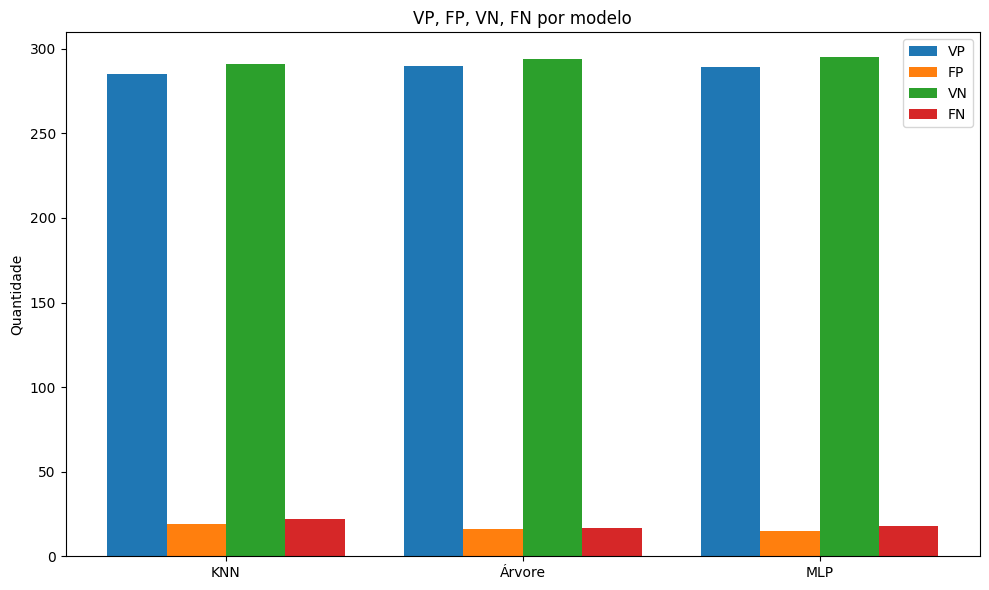

In [41]:
metricas_teste = {
    'KNN': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Árvore de Decisão': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Rede Neural': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acurácia': None,
        'Precisão': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}

# Calcular os valores para cada modelo
vp_knn, fp_knn, vn_knn, fn_knn = contar_confusao(df_resultados["KNN"], df_resultados["Real"])
vp_tree, fp_tree, vn_tree, fn_tree = contar_confusao(df_resultados["Árvore"], df_resultados["Real"])
vp_mlp, fp_mlp, vn_mlp, fn_mlp = contar_confusao(df_resultados["MLP"], df_resultados["Real"])

# Calcular métricas globais
precision_knn = vp_knn / (vp_knn + fp_knn) if (vp_knn + fp_knn) > 0 else 0
recall_knn = vp_knn / (vp_knn + fn_knn) if (vp_knn + fn_knn) > 0 else 0
specificity_knn = vn_knn / (vn_knn + fp_knn) if (vn_knn + fp_knn) > 0 else 0
accuracy_knn = (vp_knn + vn_knn) / (vp_knn + vn_knn + fp_knn + fn_knn)
f1_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn) if (precision_knn + recall_knn) > 0 else 0
tfp_knn = fp_knn / (fp_knn + vn_knn) if (fp_knn + vn_knn) > 0 else 0
tfn_knn = fn_knn / (fn_knn + vp_knn) if (fn_knn + vp_knn) > 0 else 0

metricas_teste['KNN']['Acurácia'] = accuracy_knn
metricas_teste['KNN']['Precisão'] = precision_knn
metricas_teste['KNN']['Recall'] = recall_knn
metricas_teste['KNN']['Especificidade'] = specificity_knn
metricas_teste['KNN']['F1-score'] = f1_score_knn
metricas_teste['KNN']['TFP'] = tfp_knn
metricas_teste['KNN']['TFN'] = tfn_knn
metricas_teste['KNN']['VP'] = vp_knn
metricas_teste['KNN']['VN'] = vn_knn
metricas_teste['KNN']['FP'] = fp_knn
metricas_teste['KNN']['FN'] = fn_knn

# Calcular métricas globais
precision_tree = vp_tree / (vp_tree + fp_tree) if (vp_tree + fp_tree) > 0 else 0
recall_tree = vp_tree / (vp_tree + fn_tree) if (vp_tree + fn_tree) > 0 else 0
specificity_tree = vn_tree / (vn_tree + fp_tree) if (vn_tree + fp_tree) > 0 else 0
accuracy_tree = (vp_tree + vn_tree) / (vp_tree + vn_tree + fp_tree + fn_tree)
f1_score_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree) if (precision_tree + recall_tree) > 0 else 0
tfp_tree = fp_tree / (fp_tree + vn_tree) if (fp_tree + vn_tree) > 0 else 0
tfn_tree = fn_tree / (fn_tree + vp_tree) if (fn_tree + vp_tree) > 0 else 0

metricas_teste['Árvore de Decisão']['Acurácia'] = accuracy_tree
metricas_teste['Árvore de Decisão']['Precisão'] = precision_tree
metricas_teste['Árvore de Decisão']['Recall'] = recall_tree
metricas_teste['Árvore de Decisão']['Especificidade'] = specificity_tree
metricas_teste['Árvore de Decisão']['F1-score'] = f1_score_tree
metricas_teste['Árvore de Decisão']['TFP'] = tfp_tree
metricas_teste['Árvore de Decisão']['TFN'] = tfn_tree
metricas_teste['Árvore de Decisão']['VP'] = vp_tree
metricas_teste['Árvore de Decisão']['VN'] = vn_tree
metricas_teste['Árvore de Decisão']['FP'] = fp_tree
metricas_teste['Árvore de Decisão']['FN'] = fn_tree

# Calcular métricas globais
precision_mlp = vp_mlp / (vp_mlp + fp_mlp) if (vp_mlp + fp_mlp) > 0 else 0
recall_mlp = vp_mlp / (vp_mlp + fn_mlp) if (vp_mlp + fn_mlp) > 0 else 0
specificity_mlp = vn_mlp / (vn_mlp + fp_mlp) if (vn_mlp + fp_mlp) > 0 else 0
accuracy_mlp = (vp_mlp + vn_mlp) / (vp_mlp + vn_mlp + fp_mlp + fn_mlp)
f1_score_mlp = 2 * (precision_mlp * recall_mlp) / (precision_mlp + recall_mlp) if (precision_mlp + recall_mlp) > 0 else 0
tfp_mlp = fp_mlp / (fp_mlp + vn_mlp) if (fp_mlp + vn_mlp) > 0 else 0
tfn_mlp = fn_mlp / (fn_mlp + vp_mlp) if (fn_mlp + vp_mlp) > 0 else 0

metricas_teste['Rede Neural']['Acurácia'] = accuracy_mlp
metricas_teste['Rede Neural']['Precisão'] = precision_mlp
metricas_teste['Rede Neural']['Recall'] = recall_mlp
metricas_teste['Rede Neural']['Especificidade'] = specificity_mlp
metricas_teste['Rede Neural']['F1-score'] = f1_score_mlp
metricas_teste['Rede Neural']['TFP'] = tfp_mlp
metricas_teste['Rede Neural']['TFN'] = tfn_mlp
metricas_teste['Rede Neural']['VP'] = vp_mlp
metricas_teste['Rede Neural']['VN'] = vn_mlp
metricas_teste['Rede Neural']['FP'] = fp_mlp
metricas_teste['Rede Neural']['FN'] = fn_mlp

df_metricas_teste= pd.DataFrame.from_dict(metricas_teste, orient='index')

# Preparar dados para o gráfico
modelos = ['KNN', 'Árvore', 'MLP']
valores = {
    'VP': [vp_knn, vp_tree, vp_mlp],
    'FP': [fp_knn, fp_tree, fp_mlp],
    'VN': [vn_knn, vn_tree, vn_mlp],
    'FN': [fn_knn, fn_tree, fn_mlp]
}

# Criar gráfico de colunas agrupadas
x = range(len(modelos))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([p - 1.5*width for p in x], valores['VP'], width, label='VP')
ax.bar([p - 0.5*width for p in x], valores['FP'], width, label='FP')
ax.bar([p + 0.5*width for p in x], valores['VN'], width, label='VN')
ax.bar([p + 1.5*width for p in x], valores['FN'], width, label='FN')

ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.set_ylabel("Quantidade")
ax.set_title("VP, FP, VN, FN por modelo")
ax.legend()
plt.tight_layout()
plt.show()

In [42]:
df_metricas_teste


,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score
KNN,285,19,291,22,0.933549,0.937500,0.928339,0.938710,0.061290,0.071661,0.932897
Árvore de Decisão,290,16,294,17,0.946515,0.947712,0.944625,0.948387,0.051613,0.055375,0.946166
Rede Neural,289,15,295,18,0.946515,0.950658,0.941368,0.951613,0.048387,0.058632,0.945990


In [43]:
# Calcular a média das métricas principais para cada modelo
metricas_principais = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
df_metricas_teste['Média'] = df_metricas_teste[metricas_principais].mean(axis=1)

# Ordenar os modelos pela média das métricas principais
df_metricas_teste = df_metricas_teste.sort_values(by='Média')

In [44]:
df_metricas_teste

,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score,Média
KNN,285,19,291,22,0.933549,0.937500,0.928339,0.938710,0.061290,0.071661,0.932897,0.933071
Rede Neural,289,15,295,18,0.946515,0.950658,0.941368,0.951613,0.048387,0.058632,0.945990,0.946133
Árvore de Decisão,290,16,294,17,0.946515,0.947712,0.944625,0.948387,0.051613,0.055375,0.946166,0.946255


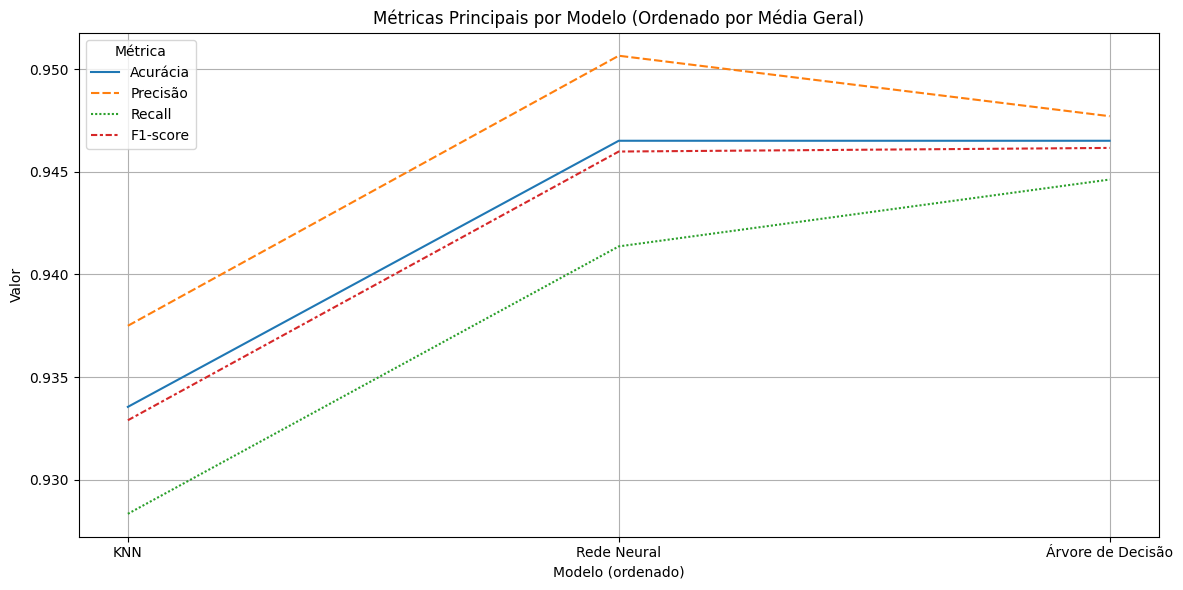

In [45]:
# Plotar gráfico de linhas com os modelos ordenados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_teste[metricas_principais])
plt.title('Métricas Principais por Modelo (Ordenado por Média Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_teste.index)), labels=df_metricas_teste.index, rotation=0)
plt.legend(title='Métrica')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df_metricas_teste = pd.concat([df_metricas_teste, df_metricas_teste_baseline])
# Calcular a média das métricas principais para cada modelo
metricas_principais = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
df_metricas_teste['Média'] = df_metricas_teste[metricas_principais].mean(axis=1)

# Ordenar os modelos pela média das métricas principais
df_metricas_teste = df_metricas_teste.sort_values(by='Média')

In [47]:
df_metricas_teste

,VP,FP,VN,FN,Acurácia,Precisão,Recall,Especificidade,TFP,TFN,F1-score,Média
KNN,285,19,291,22,0.933549,0.937500,0.928339,0.938710,0.061290,0.071661,0.932897,0.933071
Baseline,288,15,295,19,0.944895,0.950495,0.938111,0.951613,0.048387,0.061889,0.944262,0.944441
Rede Neural,289,15,295,18,0.946515,0.950658,0.941368,0.951613,0.048387,0.058632,0.945990,0.946133
Árvore de Decisão,290,16,294,17,0.946515,0.947712,0.944625,0.948387,0.051613,0.055375,0.946166,0.946255


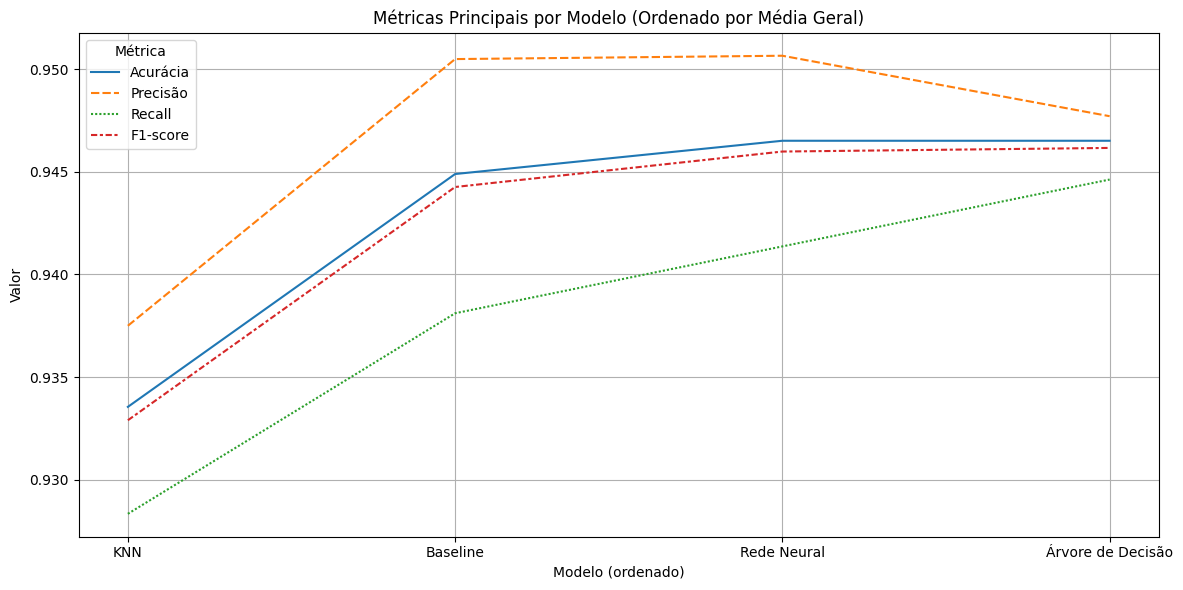

In [48]:
# Plotar gráfico de linhas com os modelos ordenados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_teste[metricas_principais])
plt.title('Métricas Principais por Modelo (Ordenado por Média Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_teste.index)), labels=df_metricas_teste.index, rotation=0)
plt.legend(title='Métrica')
plt.grid(True)
plt.tight_layout()
plt.show()